In [1]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
text_data= pd.read_csv("C:\\Users\\snmuj\\Downloads\\GenSim-Topic-Modeling-main\\GenSim-Topic-Modeling-main\\man-opinion.csv")
print(text_data.head(2))
print(len(text_data))

   Id                                               Text
0   1  الرجل المسلم الشرعية وممارسة الضغط على حدد مسؤ...
1   2            الرسول عليه السلام كل بيمينك قال الرجل 
19990


In [3]:
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [4]:
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snmuj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
text_data.dropna(axis = 0, how ='any',inplace=True) 
text_data['Text'] = text_data['Text'].apply(clean_text)
text_data['Num_words_text'] = text_data['Text'].apply(lambda x:len(str(x).split())) 
print(len(text_data))
max_text_data_sentence_length  = text_data['Num_words_text'].max()
mask = (text_data['Num_words_text'] < 100) & (text_data['Num_words_text'] >=20)

19990


In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('function-ar')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
text_data['Text']=text_data['Text'].apply(remove_stopwords)

In [7]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz (12.0 MB)


In [8]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [10]:
import spacy
spacy.load("en_core_web_sm")

import spacy
spacy.load("xx_ent_wiki_sm")

import xx_ent_wiki_sm
nlp = xx_ent_wiki_sm.load()

In [11]:
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ', 'VERB']):
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [12]:
text_list=text_data['Text'].tolist()
print(text_list[1])
tokenized_texts = lemmatization(text_list)
print(tokenized_texts[1])

الرسول السلام بيمينك الرجل
['بيمينك', 'الرجل']


### Create vocabulary dictionary and document term matrix

In [13]:
dictionary = corpora.Dictionary(tokenized_texts)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_texts]

In [14]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [15]:
lda_model.print_topics()

[(0,
  '0.031*"الشيخ" + 0.013*"أحمد" + 0.012*"محمد" + 0.011*"مستوى" + 0.010*"كلمة" + 0.010*"بعيدا" + 0.009*"قرأت" + 0.009*"العمل" + 0.008*"يقال" + 0.008*"الأم"'),
 (1,
  '0.218*"الرجال" + 0.016*"الناس" + 0.008*"الضعف" + 0.008*"العربية" + 0.007*"الجنسي" + 0.007*"كبيرة" + 0.007*"الدين" + 0.006*"السعودية" + 0.005*"النساء" + 0.005*"يعانون"'),
 (2,
  '0.016*"الأول" + 0.012*"إبراهيم" + 0.010*"سلمان" + 0.009*"العطاء" + 0.007*"مجتمعنا" + 0.007*"الماء" + 0.007*"نسبة" + 0.007*"مجال" + 0.007*"يوجد" + 0.006*"بناء"'),
 (3,
  '0.103*"الرجل" + 0.032*"الله" + 0.009*"الشباب" + 0.007*"حينما" + 0.007*"العلاقة" + 0.007*"البيت" + 0.007*"نفسه" + 0.007*"الأبيض" + 0.006*"سواء" + 0.006*"بينما"'),
 (4,
  '0.031*"الشعر" + 0.024*"العزيز" + 0.013*"الجزيرة" + 0.012*"الآخر" + 0.008*"الأفذاذ" + 0.008*"مواقف" + 0.006*"يختلف" + 0.006*"المريض" + 0.006*"يحمل" + 0.006*"بأنها"'),
 (5,
  '0.017*"يعرف" + 0.017*"الحب" + 0.014*"الكبير" + 0.013*"الوفاء" + 0.013*"علاقة" + 0.007*"تعالى" + 0.007*"المحبوب" + 0.007*"خصوبة" + 0.006*"

In [16]:
# Visualize the topics
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\snmuj\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.356605  0.006922       1        1  27.944681
1      0.057911  0.343582       2        1  14.097057
3     -0.195390 -0.027217       3        1  12.485868
0      0.075101 -0.035326       4        1   7.310445
5      0.068339 -0.052154       5        1   6.785850
6      0.069579 -0.050299       6        1   6.598646
2      0.072166 -0.050620       7        1   6.499188
9      0.070524 -0.036403       8        1   6.355527
7      0.066965 -0.050262       9        1   6.255754
4      0.071410 -0.048224      10        1   5.666985, topic_info=           Term          Freq         Total Category  logprob  loglift
0         الرجل  10451.000000  10451.000000  Default  30.0000  30.0000
1046     الرجال   2437.000000   2437.000000  Default  29.0000  29.0000
238        الله    320.000000    320.000000  Default  28.0000  28.0000
360   عبدالعزيز    174.000000    174.000000  Default  27.0000  27.0000
676       الشيخ    178.000000    178.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
755       الموت     13.352766     14.175568  Topic10  -5.8176   2.8107
6640   المتقدمة     13.248792     14.071776  Topic10  -5.8254   2.8102
7852     السائل     13.106819     13.929665  Topic10  -5.8362   2.8096
12         بعدد     12.812515     13.635343  Topic10  -5.8589   2.8083
170      العزيز    109.555953    128.261606  Topic10  -3.7129   2.7129

[353 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1016      9  0.988882  أبناء
1039      3  0.970373  أثناء
3387      8  0.956039   أجمل
166       4  0.994974   أحمد
3771      8  0.978908  أسباب
...     ...       ...    ...
139       1  0.992954   يقول
812       1  0.984447   يملك
3056      4  0.985268   ينظر
147       7  0.975131   يوجد
4603      1  0.982335   يوما

[334 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 4, 1, 6, 7, 3, 10, 8, 5])

In [17]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -11.258886042404182

Coherence Score:  0.5720495746833995


### Method to find optimal number of topics
Code from:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore


In [18]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [19]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_texts, start=1, limit=11, step=1)

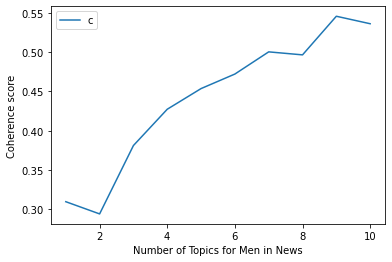

In [20]:
#Print the coherence scores
# Show graph
limit=11; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics for Men in News")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show() 

In [21]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.3097
Num Topics = 2  has Coherence Value of 0.2941
Num Topics = 3  has Coherence Value of 0.3811
Num Topics = 4  has Coherence Value of 0.4273
Num Topics = 5  has Coherence Value of 0.4536
Num Topics = 6  has Coherence Value of 0.4721
Num Topics = 7  has Coherence Value of 0.5003
Num Topics = 8  has Coherence Value of 0.4964
Num Topics = 9  has Coherence Value of 0.5456
Num Topics = 10  has Coherence Value of 0.536


In [22]:
# Select the model and print the topics
optimal_model = model_list[9]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.059*"الرجل" + 0.014*"المناسب" + 0.013*"الله" + 0.011*"الواقع" + 0.011*"أقول" + 0.010*"الرياض" + 0.009*"الأول" + 0.008*"عاما" + 0.007*"مجموعة" + 0.006*"أصبح"'),
 (1,
  '0.315*"الرجال" + 0.010*"أيضا" + 0.009*"يعانون" + 0.008*"النساء" + 0.007*"تضخم" + 0.007*"سنوات" + 0.006*"بينما" + 0.005*"لديهم" + 0.005*"طويلة" + 0.005*"الطيب"'),
 (2,
  '0.027*"المملكة" + 0.022*"عبدالعزيز" + 0.020*"العربية" + 0.019*"الجنسي" + 0.014*"السعودية" + 0.014*"علاقة" + 0.013*"الرجل" + 0.009*"بعيدا" + 0.008*"المرض" + 0.008*"منطقة"'),
 (3,
  '0.481*"الرجل" + 0.011*"المرأة" + 0.010*"الشعر" + 0.006*"الله" + 0.006*"فقال" + 0.005*"الأمر" + 0.004*"وجود" + 0.004*"شخصية" + 0.003*"الآخر" + 0.003*"أمام"'),
 (4,
  '0.063*"الرجل" + 0.017*"يقول" + 0.016*"اليوم" + 0.012*"سلطان" + 0.012*"الله" + 0.012*"الأمير" + 0.011*"الوفاء" + 0.009*"سواء" + 0.008*"صالح" + 0.007*"مكان"'),
 (5,
  '0.099*"الرجل" + 0.014*"يعرف" + 0.012*"أحمد" + 0.011*"العلاقة" + 0.009*"كلمة" + 0.009*"البيت" + 0.009*"سلمان" + 0.009*"المجتمع" + 0.007*"الأ

In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\snmuj\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.356605  0.006922       1        1  27.944632
1      0.057911  0.343582       2        1  14.095662
3     -0.195390 -0.027217       3        1  12.485920
0      0.075101 -0.035326       4        1   7.310434
5      0.068339 -0.052154       5        1   6.785844
6      0.069579 -0.050299       6        1   6.598629
2      0.072166 -0.050620       7        1   6.499189
9      0.070524 -0.036403       8        1   6.356949
7      0.066965 -0.050262       9        1   6.255760
4      0.071410 -0.048224      10        1   5.666981, topic_info=           Term          Freq         Total Category  logprob  loglift
0         الرجل  10451.000000  10451.000000  Default  30.0000  30.0000
1046     الرجال   2437.000000   2437.000000  Default  29.0000  29.0000
238        الله    320.000000    320.000000  Default  28.0000  28.0000
360   عبدالعزيز    174.000000    174.000000  Default  27.0000  27.0000
676       الشيخ    178.000000    178.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
755       الموت     13.352757     14.175569  Topic10  -5.8176   2.8107
6640   المتقدمة     13.248783     14.071778  Topic10  -5.8254   2.8102
7852     السائل     13.106809     13.929666  Topic10  -5.8362   2.8096
12         بعدد     12.812506     13.635344  Topic10  -5.8589   2.8083
170      العزيز    109.555877    128.261514  Topic10  -3.7129   2.7129

[353 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1016      9  0.988881  أبناء
1039      3  0.970368  أثناء
3387      8  0.955834   أجمل
166       4  0.994975   أحمد
3771      8  0.978698  أسباب
...     ...       ...    ...
139       1  0.992956   يقول
812       1  0.984448   يملك
3056      4  0.985269   ينظر
147       7  0.975131   يوجد
4603      1  0.982336   يوما

[334 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 4, 1, 6, 7, 3, 10, 8, 5])